### TCAV For TEXT DATA And Image DATA

#### Stripes are Generated manually

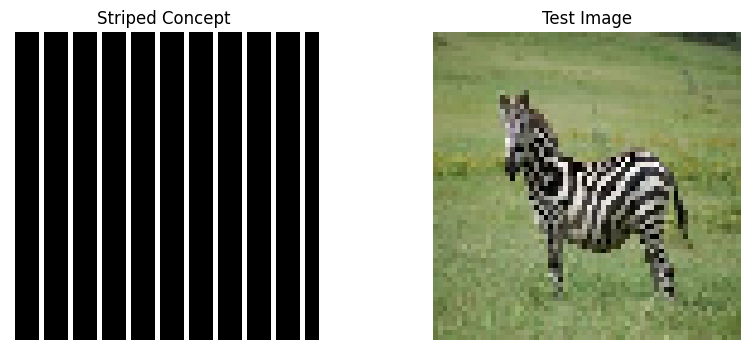

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


C:\Users\karth\AppData\Roaming\Python\Python312\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_119']
Received: inputs=Tensor(shape=(20, 64, 64, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Directional Derivative: -759.1665
TCAV Score: 1.00


C:\Users\karth\AppData\Roaming\Python\Python312\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_119']
Received: inputs=Tensor(shape=(None, 64, 64, 3))
  warnings.warn(msg)


In [17]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt

# 1. Minimal CNN model
def build_model():
    inputs = Input(shape=(64, 64, 3))
    x = Conv2D(16, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D()(x)
    x = Conv2D(32, (3, 3), activation='relu', name='target_layer')(x)
    x = MaxPooling2D()(x)
    x = Flatten()(x)
    outputs = Dense(10, activation='softmax')(x)
    return Model(inputs, outputs)

model = build_model()
intermediate_model = Model([model.input], [model.get_layer('target_layer').output])

# 2. Synthetic data generation (fixed .at[] issue)
def generate_stripes(num=20):
    stripes = []
    for _ in range(num):
        img = np.zeros((64, 64, 3))
        img[:, ::6, :] = 1  # Every 6th column becomes white
        stripes.append(img)
    return np.array(stripes)

stripes = generate_stripes()
random_images = np.random.rand(20, 64, 64, 3)  # Negative examples

# 3. Display sample images
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow(stripes[0])
plt.title("Striped Concept")
plt.axis('off')

plt.subplot(122)
# Replace the sample_image with:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
sample_image = img_to_array(load_img("zebra.jpeg", target_size=(64, 64)))/255.0
plt.imshow(sample_image)
plt.title("Test Image")
plt.axis('off')
plt.show()

# 4. Get activations
activations_stripes = intermediate_model.predict(stripes)
activations_random = intermediate_model.predict(random_images)

# 5. Train CAV
X = np.vstack([activations_stripes.reshape(20, -1), 
               activations_random.reshape(20, -1)])
y = np.array([1]*20 + [0]*20)
cav = SGDClassifier().fit(X, y).coef_

# 6. Calculate scores
sample_act = intermediate_model.predict(sample_image[np.newaxis, ...]).reshape(-1)
dd = np.dot(sample_act, cav.T)[0]
tcav = (np.dot(activations_stripes.reshape(20, -1), cav.T) > 0).mean()

print(f"Directional Derivative: {dd:.4f}\nTCAV Score: {tcav:.2f}")

#### For Text Data

In [4]:
import numpy as np
from sklearn.linear_model import SGDClassifier

# Mock BERT embeddings (to work offline)
# In reality, you'd use transformers to get these
def mock_embed(texts):
    return np.random.rand(len(texts), 768)  # 768-dim vectors like BERT

# Define your text groups
happy_texts = [
    "I am happy", 
    "Feeling joyful",
    "This is wonderful"
]

neutral_texts = [
    "The table is brown",
    "It's raining today",
    "My bag is heavy"
]

target_texts = [
    "This movie is great",
    "I love this song",
    "What a nice day"
]

# Generate mock embeddings
happy_emb = mock_embed(happy_texts)
neutral_emb = mock_embed(neutral_texts)
target_emb = mock_embed(target_texts)

# Train CAV (Concept Activation Vector)
X = np.vstack([happy_emb, neutral_emb])
y = np.array([1]*len(happy_texts) + [0]*len(neutral_texts))  # 1=happy, 0=neutral

clf = SGDClassifier().fit(X, y)
cav = clf.coef_[0]  # Get the concept direction

# Calculate alignment score
scores = np.dot(target_emb, cav)
tcav_score = np.mean(scores > 0)  # % of targets aligned with happy concept

print(f"TCAV Score (happy concept alignment): {tcav_score:.2f}")

TCAV Score (happy concept alignment): 1.00


#### with Concept image and sample image


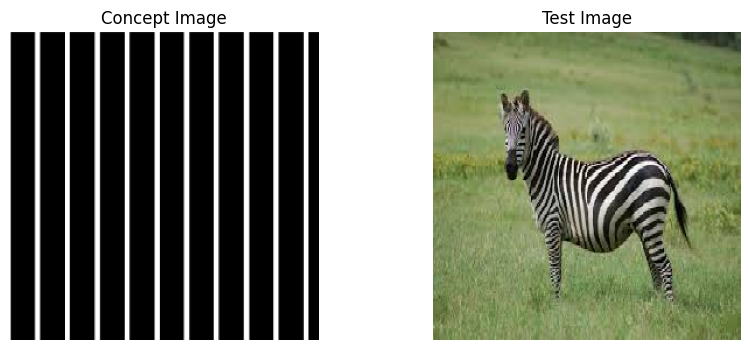

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


E:\Xai_Req_Setup\Python3109\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_7']
Received: inputs=Tensor(shape=(1, 264, 264, 3))
  warnings.warn(msg)
E:\Xai_Req_Setup\Python3109\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_7']
Received: inputs=Tensor(shape=(None, 264, 264, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Directional Derivative: -31344.7773
TCAV Score: 1.00


In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# 1. Minimal CNN model
def build_model():
    inputs = Input(shape=(264, 264, 3))
    x = Conv2D(16, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D()(x)
    x = Conv2D(32, (3, 3), activation='relu', name='target_layer')(x)
    x = MaxPooling2D()(x)
    x = Flatten()(x)
    outputs = Dense(10, activation='softmax')(x)
    return Model(inputs, outputs)

model = build_model()
intermediate_model = Model([model.input], [model.get_layer('target_layer').output])

# 2. Load concept images (replace synthetic data generation)
def load_concept_images(concept_image_paths):
    concept_images = []
    for img_path in concept_image_paths:
        img = load_img(img_path, target_size=(264, 264))
        img_array = img_to_array(img) / 255.0  # Normalize the images
        concept_images.append(img_array)
    return np.array(concept_images)

# Example: Replace with paths to your concept images
concept_image_paths = ["stripes.png"]
stripes = load_concept_images(concept_image_paths)

# Random negative examples (same as before)
random_images = np.random.rand(20, 264, 264, 3)  # Negative examples

# 3. Display sample images
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow(stripes[0])
plt.title("Concept Image")
plt.axis('off')

plt.subplot(122)
# Replace the sample_image with your own test image
sample_image = img_to_array(load_img("zebra.jpeg", target_size=(264, 264)))/255.0
plt.imshow(sample_image)
plt.title("Test Image")
plt.axis('off')
plt.show()

# 4. Get activations
activations_stripes = intermediate_model.predict(stripes)
activations_random = intermediate_model.predict(random_images)

# 5. Train CAV
X = np.vstack([activations_stripes.reshape(len(stripes), -1), 
               activations_random.reshape(20, -1)])
y = np.array([1]*len(stripes) + [0]*20)  # Adjusted to the length of the concept images
cav = SGDClassifier().fit(X, y).coef_

# 6. Calculate scores
sample_act = intermediate_model.predict(sample_image[np.newaxis, ...]).reshape(-1)
dd = np.dot(sample_act, cav.T)[0]
tcav = (np.dot(activations_stripes.reshape(len(stripes), -1), cav.T) > 0).mean()

print(f"Directional Derivative: {dd:.4f}\nTCAV Score: {tcav:.2f}")
